# Boston Housing

## First Part

### Preparation

Import modules for analysis

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats

Create dataframe

In [2]:
boston_house = pd.read_csv('BostonHousing.csv')

### EDA

Check data

In [5]:
boston_house

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


The description of all the features:
- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per 10,000 dollars
- PTRATIO: Pupil-teacher ratio by town
- B: proportion of American African by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s **TARGET**

In [6]:
boston_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Check NA

In [8]:
boston_house.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Lets see on descriptive statistics 

In [313]:
boston_house.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Evaluate the medv distribution. We can see the distribution of target close to normal, except margin measure nearly 50.000$. So we need to use cook distance to select appropriate observation 

<AxesSubplot:xlabel='medv', ylabel='Density'>

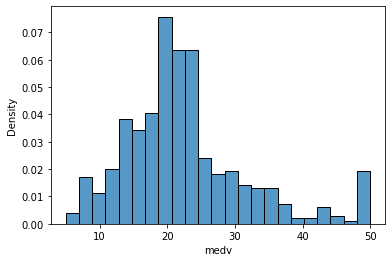

In [14]:
sns.histplot(boston_house.medv, stat='density')

Create target and feature dataframes. And start to analyse

In [20]:
boston_house_target  = boston_house.medv
boston_house_feature  = boston_house.drop('medv', axis=1)
boston_house_feature

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


### Standardization and linear model

Descriptive statistics demonstrates that features obtain different std. It can (and will) influence linear model so we have to standardize this dataset. However, previously look on original data analysis

In [21]:
X = sm.add_constant(boston_house_feature)
model = sm.OLS(boston_house_target, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          6.72e-135
Time:                        01:38:00   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

*Adj. R-squared: 0.734 and p-value = 6.72e-135* - very good for raw data but it can not reflect true dependance between target and features. Lets do standardization

In [22]:
mean_param = boston_house_feature.mean(axis=0)
stds_param = boston_house_feature.std(axis=0)

scaled_features = (boston_house_feature - mean_param) / stds_param
scaled_features

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.412820,-0.487240,0.115624,-0.272329,0.157968,0.438881,0.018654,-0.625178,-0.981871,-0.802418,1.175303,0.386834,-0.417734
502,-0.414839,-0.487240,0.115624,-0.272329,0.157968,-0.234316,0.288648,-0.715931,-0.981871,-0.802418,1.175303,0.440616,-0.500355
503,-0.413038,-0.487240,0.115624,-0.272329,0.157968,0.983986,0.796661,-0.772919,-0.981871,-0.802418,1.175303,0.440616,-0.982076
504,-0.407361,-0.487240,0.115624,-0.272329,0.157968,0.724955,0.736268,-0.667776,-0.981871,-0.802418,1.175303,0.402826,-0.864446


Again check prepared data

In [23]:
scaled_features.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,8.326673e-17,3.466704e-16,-3.016965e-15,4.677857e-16,3.563575e-15,-1.149882e-14,-1.158274e-15,7.308603e-16,-1.068535e-15,6.534079e-16,-1.084420e-14,8.117354e-15,-6.494585e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.193669e-01,-4.872402e-01,-1.556302e+00,-2.723291e-01,-1.464433e+00,-3.876413e+00,-2.333128e+00,-1.265817e+00,-9.818712e-01,-1.312691e+00,-2.704703e+00,-3.903331e+00,-1.529613e+00
25%,-4.105633e-01,-4.872402e-01,-8.668328e-01,-2.723291e-01,-9.121262e-01,-5.680681e-01,-8.366200e-01,-8.048913e-01,-6.373311e-01,-7.668172e-01,-4.875567e-01,2.048688e-01,-7.986296e-01
50%,-3.902803e-01,-4.872402e-01,-2.108898e-01,-2.723291e-01,-1.440749e-01,-1.083583e-01,3.170678e-01,-2.790473e-01,-5.224844e-01,-4.642132e-01,2.745872e-01,3.808097e-01,-1.810744e-01
75%,7.389247e-03,4.872402e-02,1.014995e+00,-2.723291e-01,5.980871e-01,4.822906e-01,9.059016e-01,6.617161e-01,1.659603e+00,1.529413e+00,8.057784e-01,4.332223e-01,6.024226e-01
max,9.924110e+00,3.800473e+00,2.420170e+00,3.664771e+00,2.729645e+00,3.551530e+00,1.116390e+00,3.956602e+00,1.659603e+00,1.796416e+00,1.637208e+00,4.406159e-01,3.545262e+00


And repeat linear regression by OLS using prepared data 

In [24]:
X = sm.add_constant(scaled_features)
model_scaled = sm.OLS(boston_house_target, X)
results_scaled = model_scaled.fit()

print(results_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          6.72e-135
Time:                        01:55:41   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.0

*Adj. R-squared: 0.734* - its similar to raw data but probably they have difference in the next round. Build graphs of coefficients for every feature

C:\Users\ornfi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

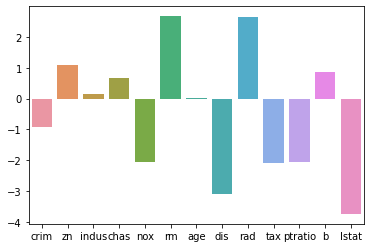

In [224]:
sns.barplot(results_scaled.params.index[1:], results_scaled.params[1:])

### Check linear dependance

Predict target values using acquired coefficients

In [29]:
prediction = results_scaled.get_prediction(X)
target_predict = prediction.predicted_mean

In [136]:
print(target_predict[:10])

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211]


Concate predicted and real target values in one dataframe for graphs

In [232]:
predict_target_df = pd.DataFrame(list(zip(target_predict.round(1), boston_house_target)),
                                columns =['Predicted target', 'Real target'])
predict_target_df

,Predicted target,Real target
0,30.0,24.0
1,25.0,21.6
2,30.6,34.7
3,28.6,33.4
4,27.9,36.2
...,...,...
501,23.5,22.4
502,22.4,20.6
503,27.6,23.9
504,26.1,22.0


Text(24.05000000000001, 0.5, 'Real value')

<Figure size 10800x6300 with 0 Axes>

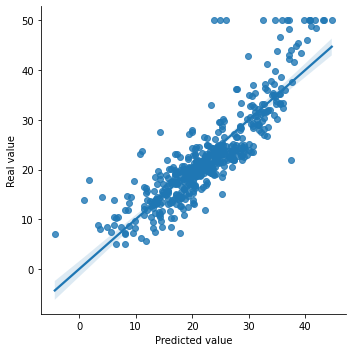

In [242]:
plt.figure(figsize=[12,7], dpi=900)
sns.lmplot(x='Predicted target', y='Real target', data=predict_target_df, order=1)
plt.xlabel('Predicted value')
plt.ylabel('Real value')

We can see that predicted target well conform with real target. However we take into acount some value in area of 50.000$ dramaticaly differ from expectation. Hence, start to use cook distance for sorting observation decreasing quality of model 

### Influential observation

In [44]:
influence = results_scaled.get_influence()
cooks = influence.cooks_distance

I use standard threshold = 0.05 

In [67]:
(cooks[1] < 0.05).sum()

0

None of the observations prevent us from building qualitative model so in the future we will use the whole dataframe

### Independence of observations

Features can interfere and be consistent with each other. Hence, we will check the collinearity of the features using correlation

In [80]:
correlation_matrix = boston_house_feature.corr()
correlation_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


Its of course nice, but very difficult to distinguish every correlation so build heatmap

<AxesSubplot:>

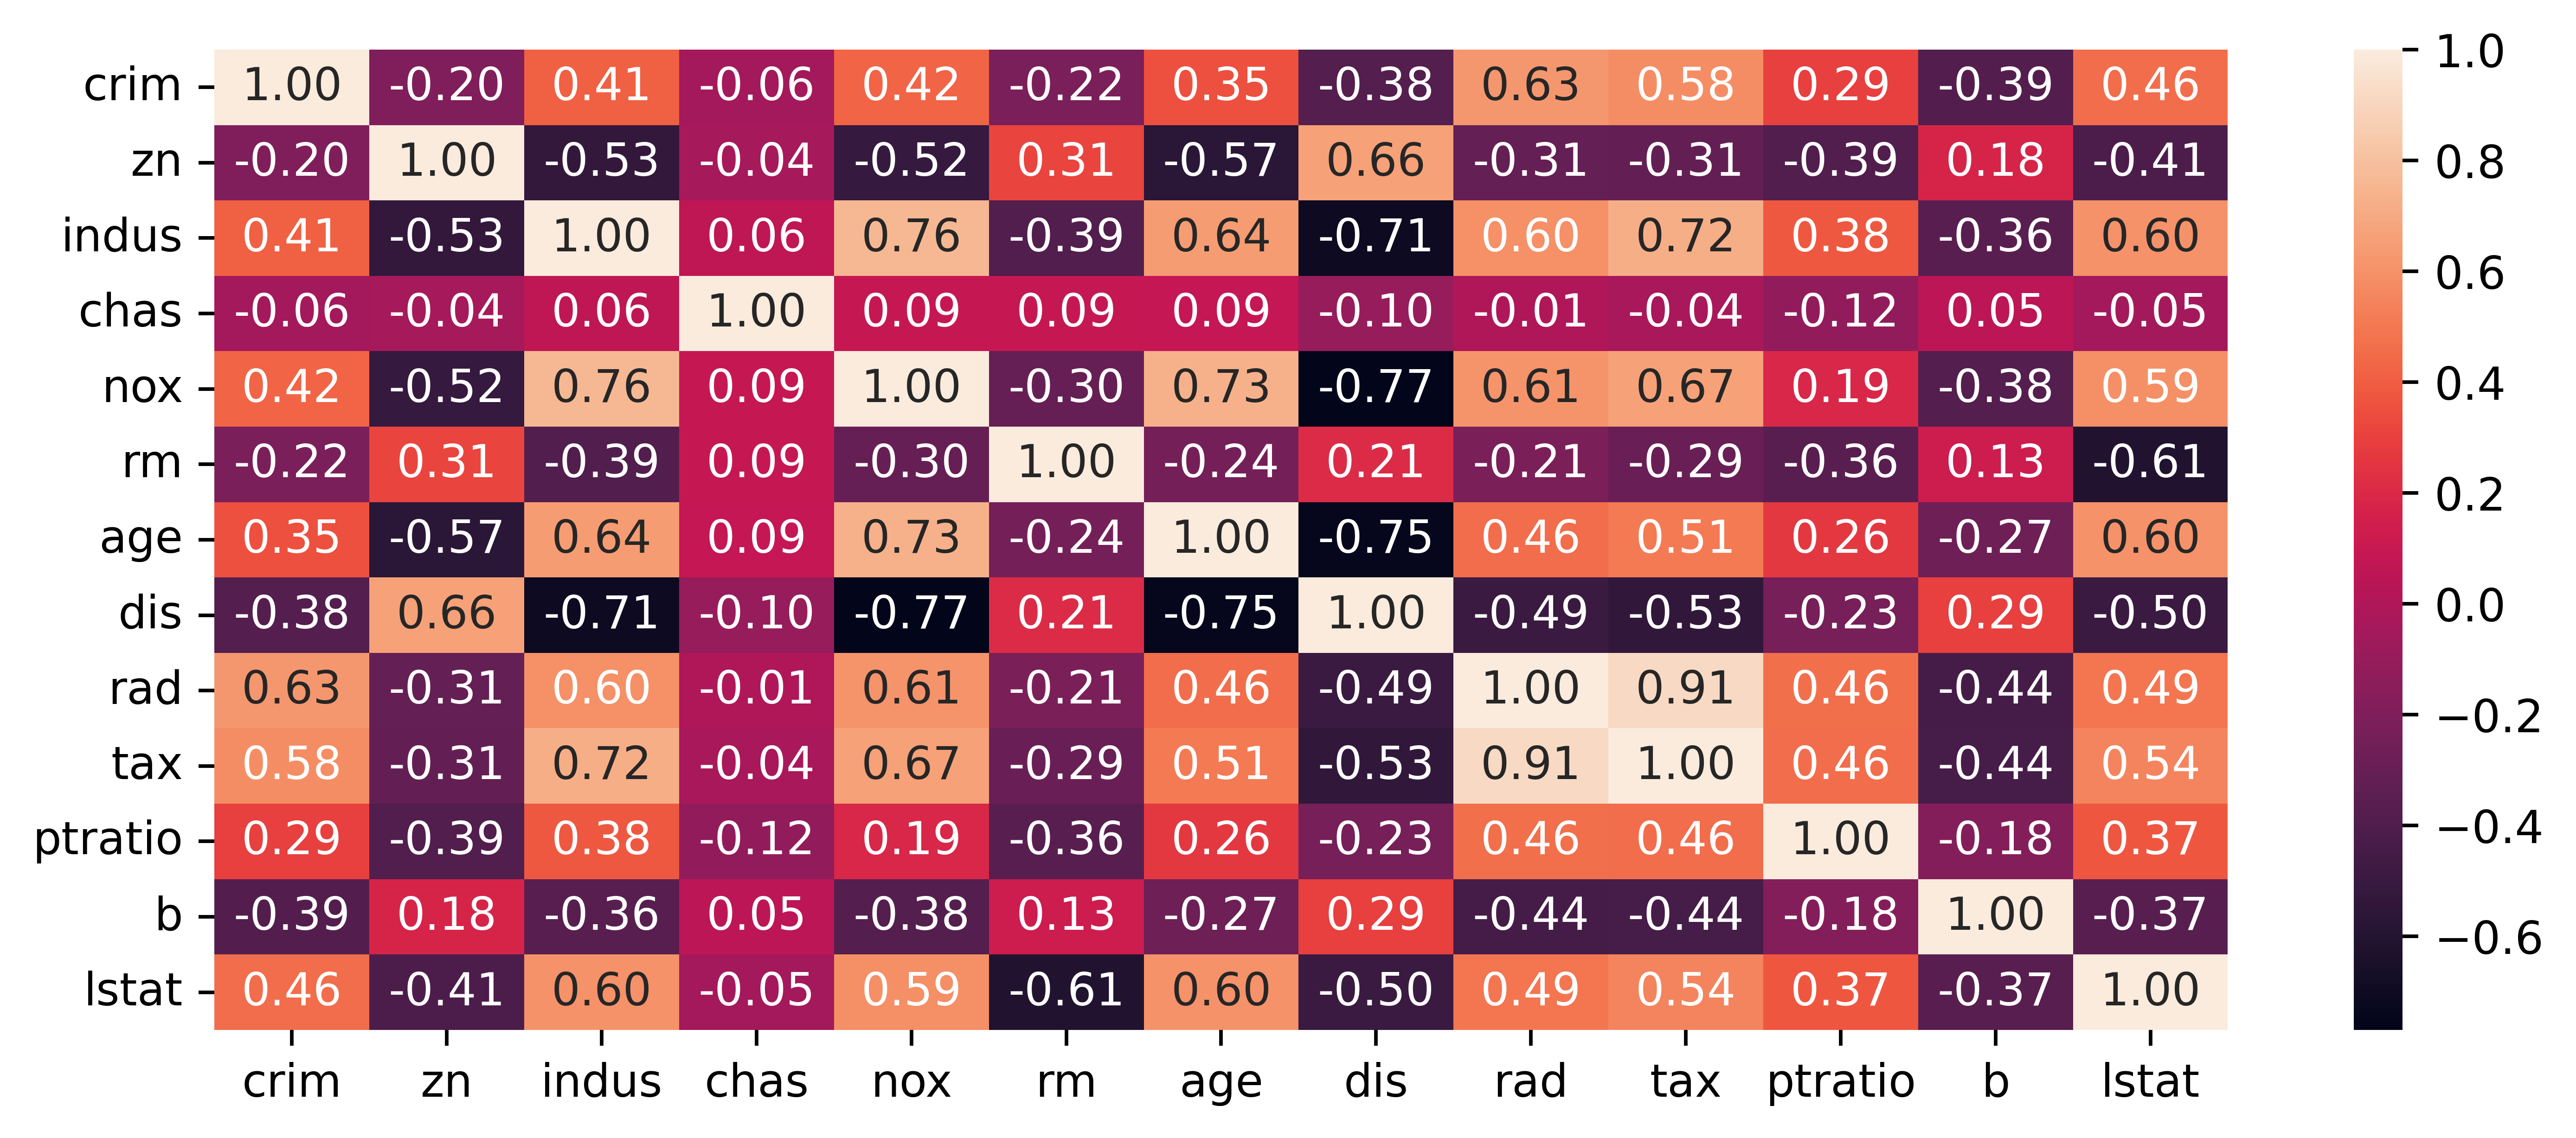

In [83]:
plt.figure(figsize=[10,4], dpi=700)
sns.heatmap(data=correlation_matrix, annot=True, fmt=".2f")

The strong positive correlation between rad and tax suggests that it is better to leave only one value for further analysis. But we'll check it later using VIF

### Distribution of prediction

Now we can estimate distribution of predicted value and will be sure that our model predict correctly without outliers

In [318]:
scipy.stats.shapiro(target_predict)   

ShapiroResult(statistic=0.9942290186882019, pvalue=0.05247299373149872)

H0 is confirmed - predicted values present normal distribution

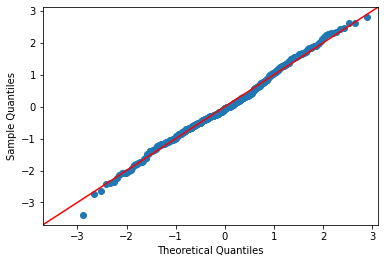

In [205]:
figure_1 = sm.qqplot(target_predict, line='45', fit=True)
plt.show()

<AxesSubplot:ylabel='Density'>

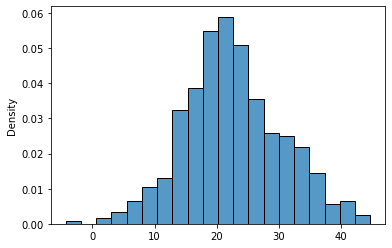

In [159]:
sns.histplot(target_predict, stat='density')

QQplot and histplot also confirm good picture of normal distibution 

### Disribution of error

However it is more interesting to look on distribution of error. Due to this parameter we can say how well the model predicts is not up to predicts or over-predicts.

First of all we will calculate errors

In [320]:
errors_full = boston_house_target - target_predict

In [322]:
scipy.stats.shapiro(errors_full) 

ShapiroResult(statistic=0.9013808369636536, pvalue=1.4802261404015972e-17)

H0 reject - is not normal disribution so very interesting see histplot of errors

<AxesSubplot:xlabel='medv', ylabel='Count'>

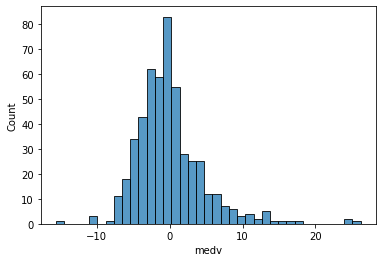

In [206]:
sns.histplot(errors_full)

Predictions of our regression model often is not up to predicts 

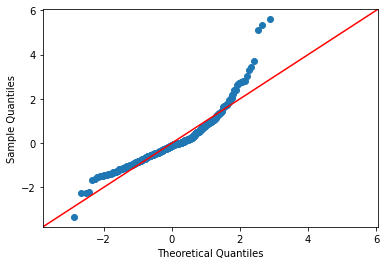

In [211]:
figure_errors_ggplot = sm.qqplot(errors_full, line='45', fit=True)

QQplot also shows the increasing density of value under zero and some outliersin the highest quartile

### Prediction by max value

Find max coefficient for separated prediction

In [132]:
max(abs(results_scaled.params[1:]))

3.7473318548615406

In [133]:
results_scaled.params

const      22.532806
crim       -0.929065
zn          1.082639
indus       0.141039
chas        0.682414
nox        -2.058754
rm          2.676877
age         0.019485
dis        -3.107116
rad         2.664852
tax        -2.078837
ptratio    -2.062646
b           0.850109
lstat      -3.747332
dtype: float64

The best abs coefficient consist with lstat feature. So try predict value using only lstat 

In [109]:
prediction_by_lstat = X.lstat * results_scaled.params[13]

C:\Users\ornfi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ornfi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


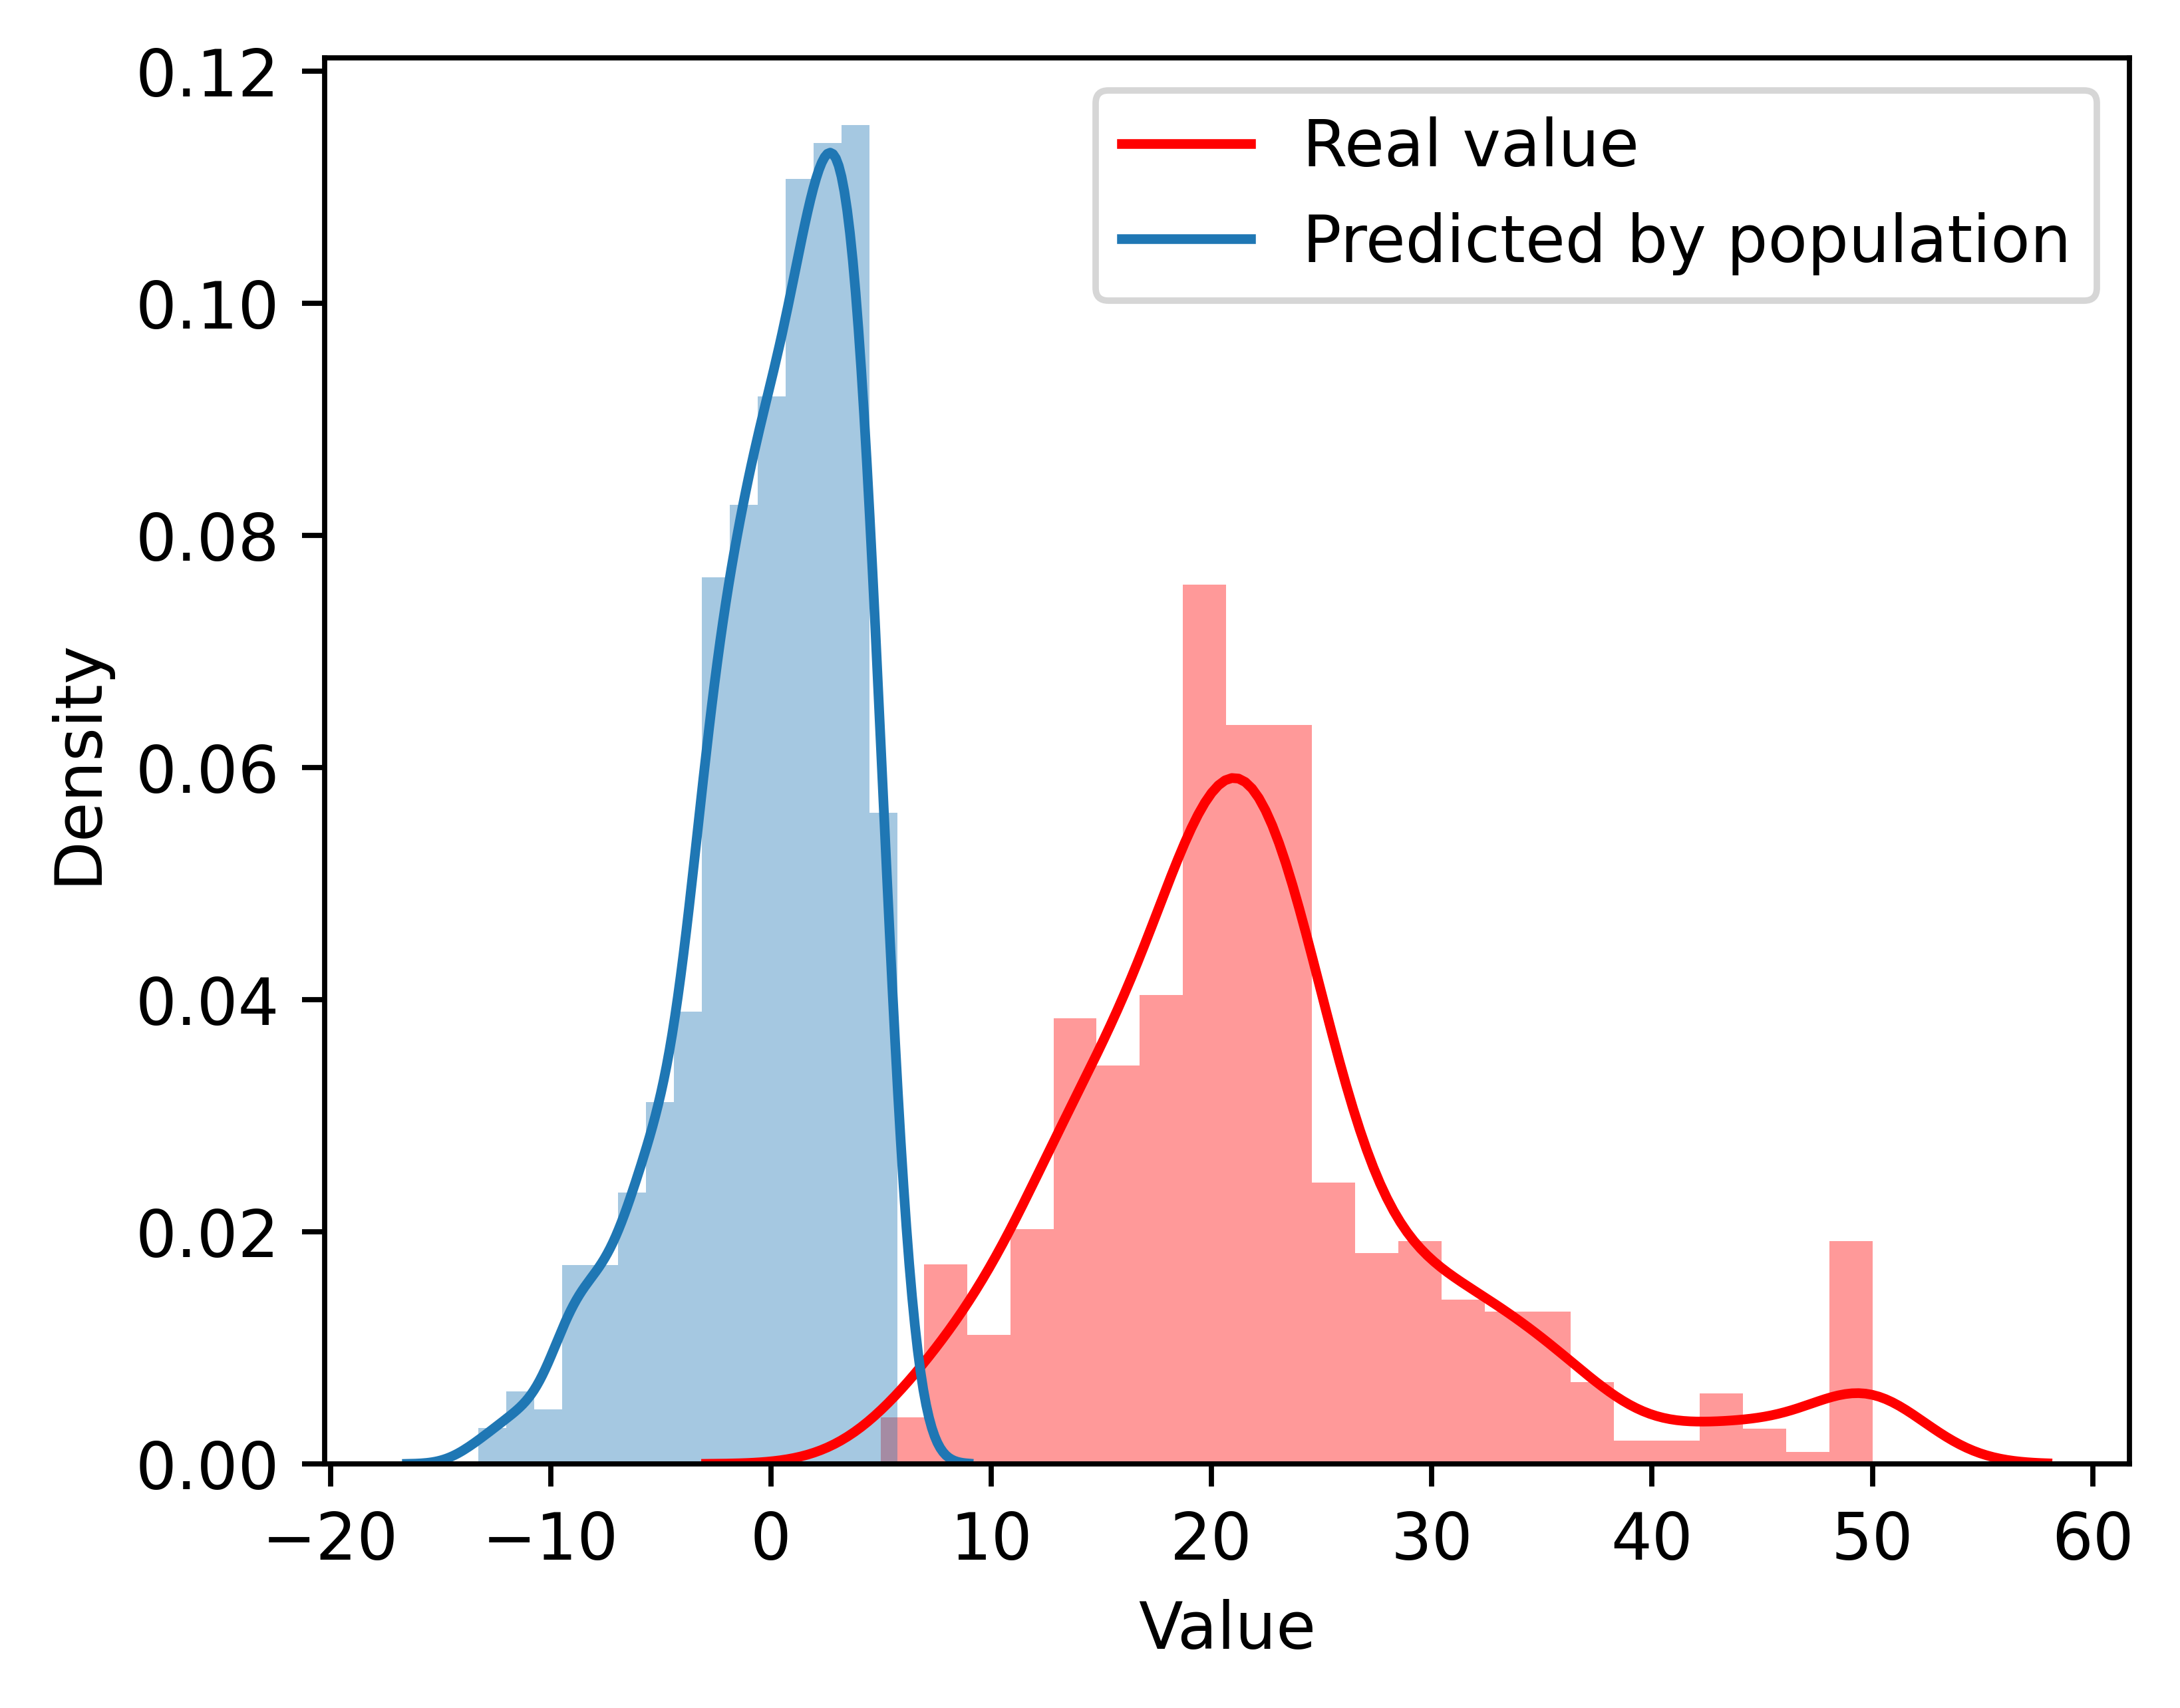

In [119]:
plt.figure(figsize=[5,4], dpi=700)
sns.distplot(boston_house.medv, color='red')
sns.distplot(prediction_by_lstat)
plt.xlabel('Value')
plt.legend(['Real value', 'Predicted by population'])

The graph demontrates that prediction based only on lstat is under real target value

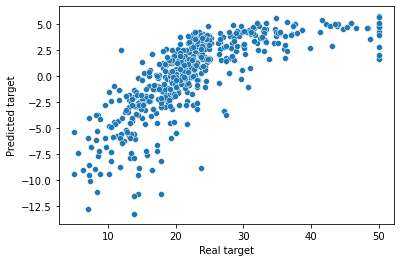

In [323]:
sns.scatterplot(y = prediction_by_lstat, x = boston_house_target);
plt.xlabel("Real target")
plt.ylabel("Predicted target");

The scatterplot exellently shows that lstat has a linear dependence on the area of values not exceeding 30, after which the prediction does not reflect the real cost of housing

## Second Part

Then start to analyse which parameters could help to increase cost of house. To commence with, we can create correlation plot of every standardized features with target

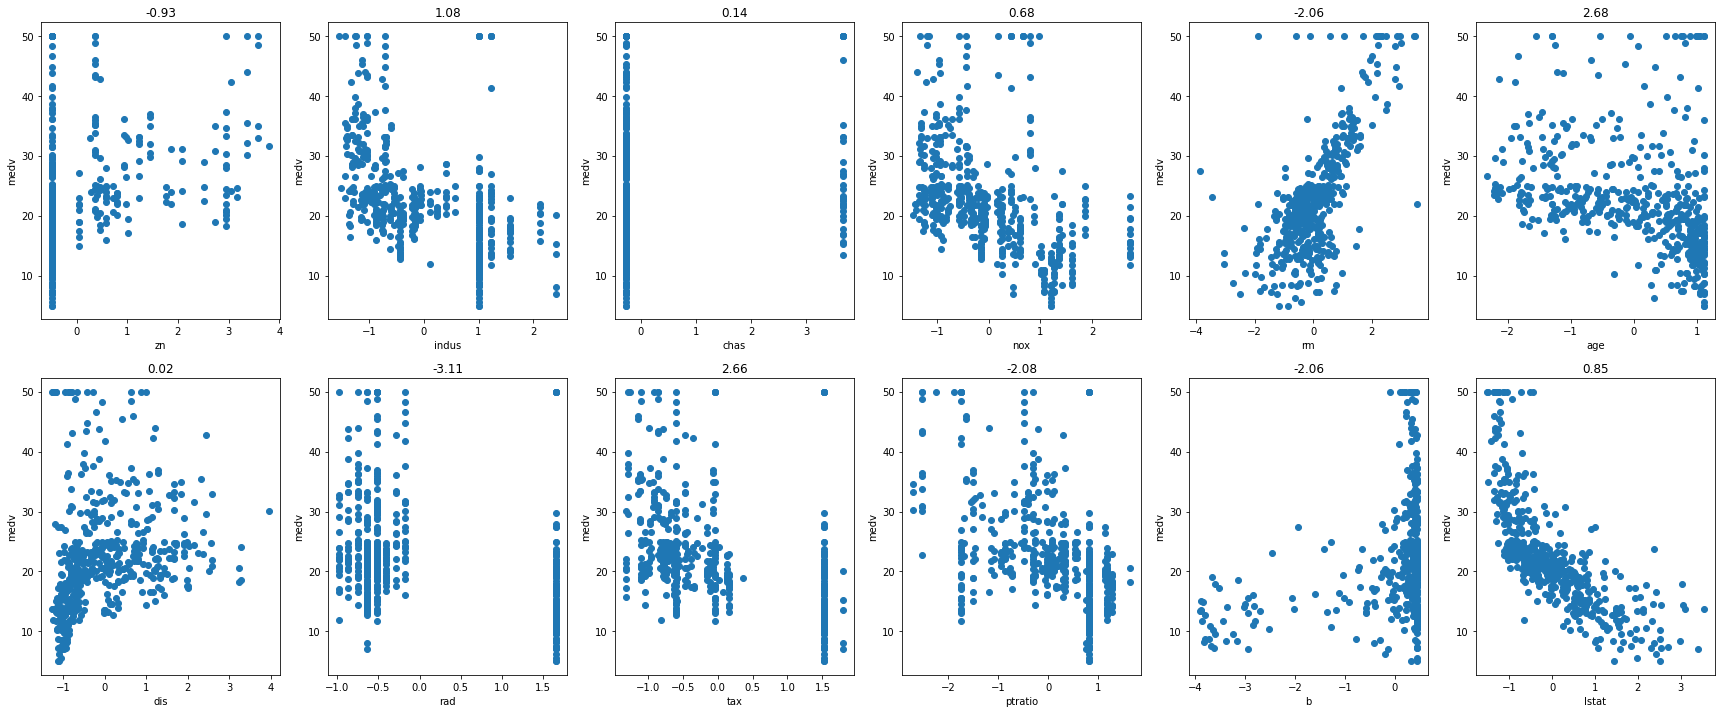

In [220]:
name_of_column = list(scaled_features.columns)
column_number = 1

fig, axes = plt.subplots(ncols=6, nrows=2, figsize=(30,12))
for i in range(2):
    for j in range(6):
        ## Store column name in variable
        axes[i, j].scatter(scaled_features.iloc[:,column_number], boston_house_target)
        axes[i, j].set_xlabel(name_of_column[column_number])
        axes[i, j].set_ylabel('medv')
        axes[i, j].set_title(results_scaled.params[column_number].round(2))
        column_number += 1

This plot give opportunity to assume what features is better for linear model and what features we have to analyse additionally.

For example, rad and chas are categorical variables so it is worth considering how they affect the value of target.

Divide all value by chas

In [256]:
target_no_river = boston_house_target[boston_house["chas"] == 0]
target_river = boston_house_target[boston_house["chas"] == 1]

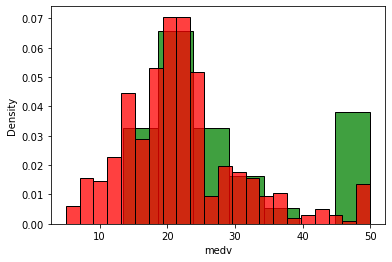

In [257]:
sns.histplot(target_river, stat="density", color="green")
sns.histplot(target_no_river, stat="density", color="red");

The histogram shows that separated targets have abnormal disribution and different outliers. So we have to use nonparametric criteria to understand how chas impacts target

In [258]:
scipy.stats.mannwhitneyu(target_river, target_no_river)

MannwhitneyuResult(statistic=10879.5, pvalue=0.0015816705011294974)

The difference between groups is significant 

In [259]:
target_river.mean(), target_no_river.mean()

(28.44, 22.093842887473482)

In [260]:
target_river.median(), target_no_river.median()

(23.3, 20.9)

<AxesSubplot:xlabel='chas', ylabel='medv'>

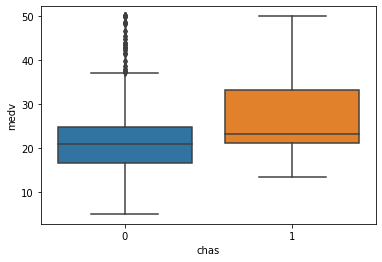

In [262]:
sns.boxplot(data=boston_house, x="chas", y="medv")

Housing closed to river obtains higher price

To look at rad feature

In [263]:
boston_house.rad.unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

Text(0, 0.5, 'Real value')

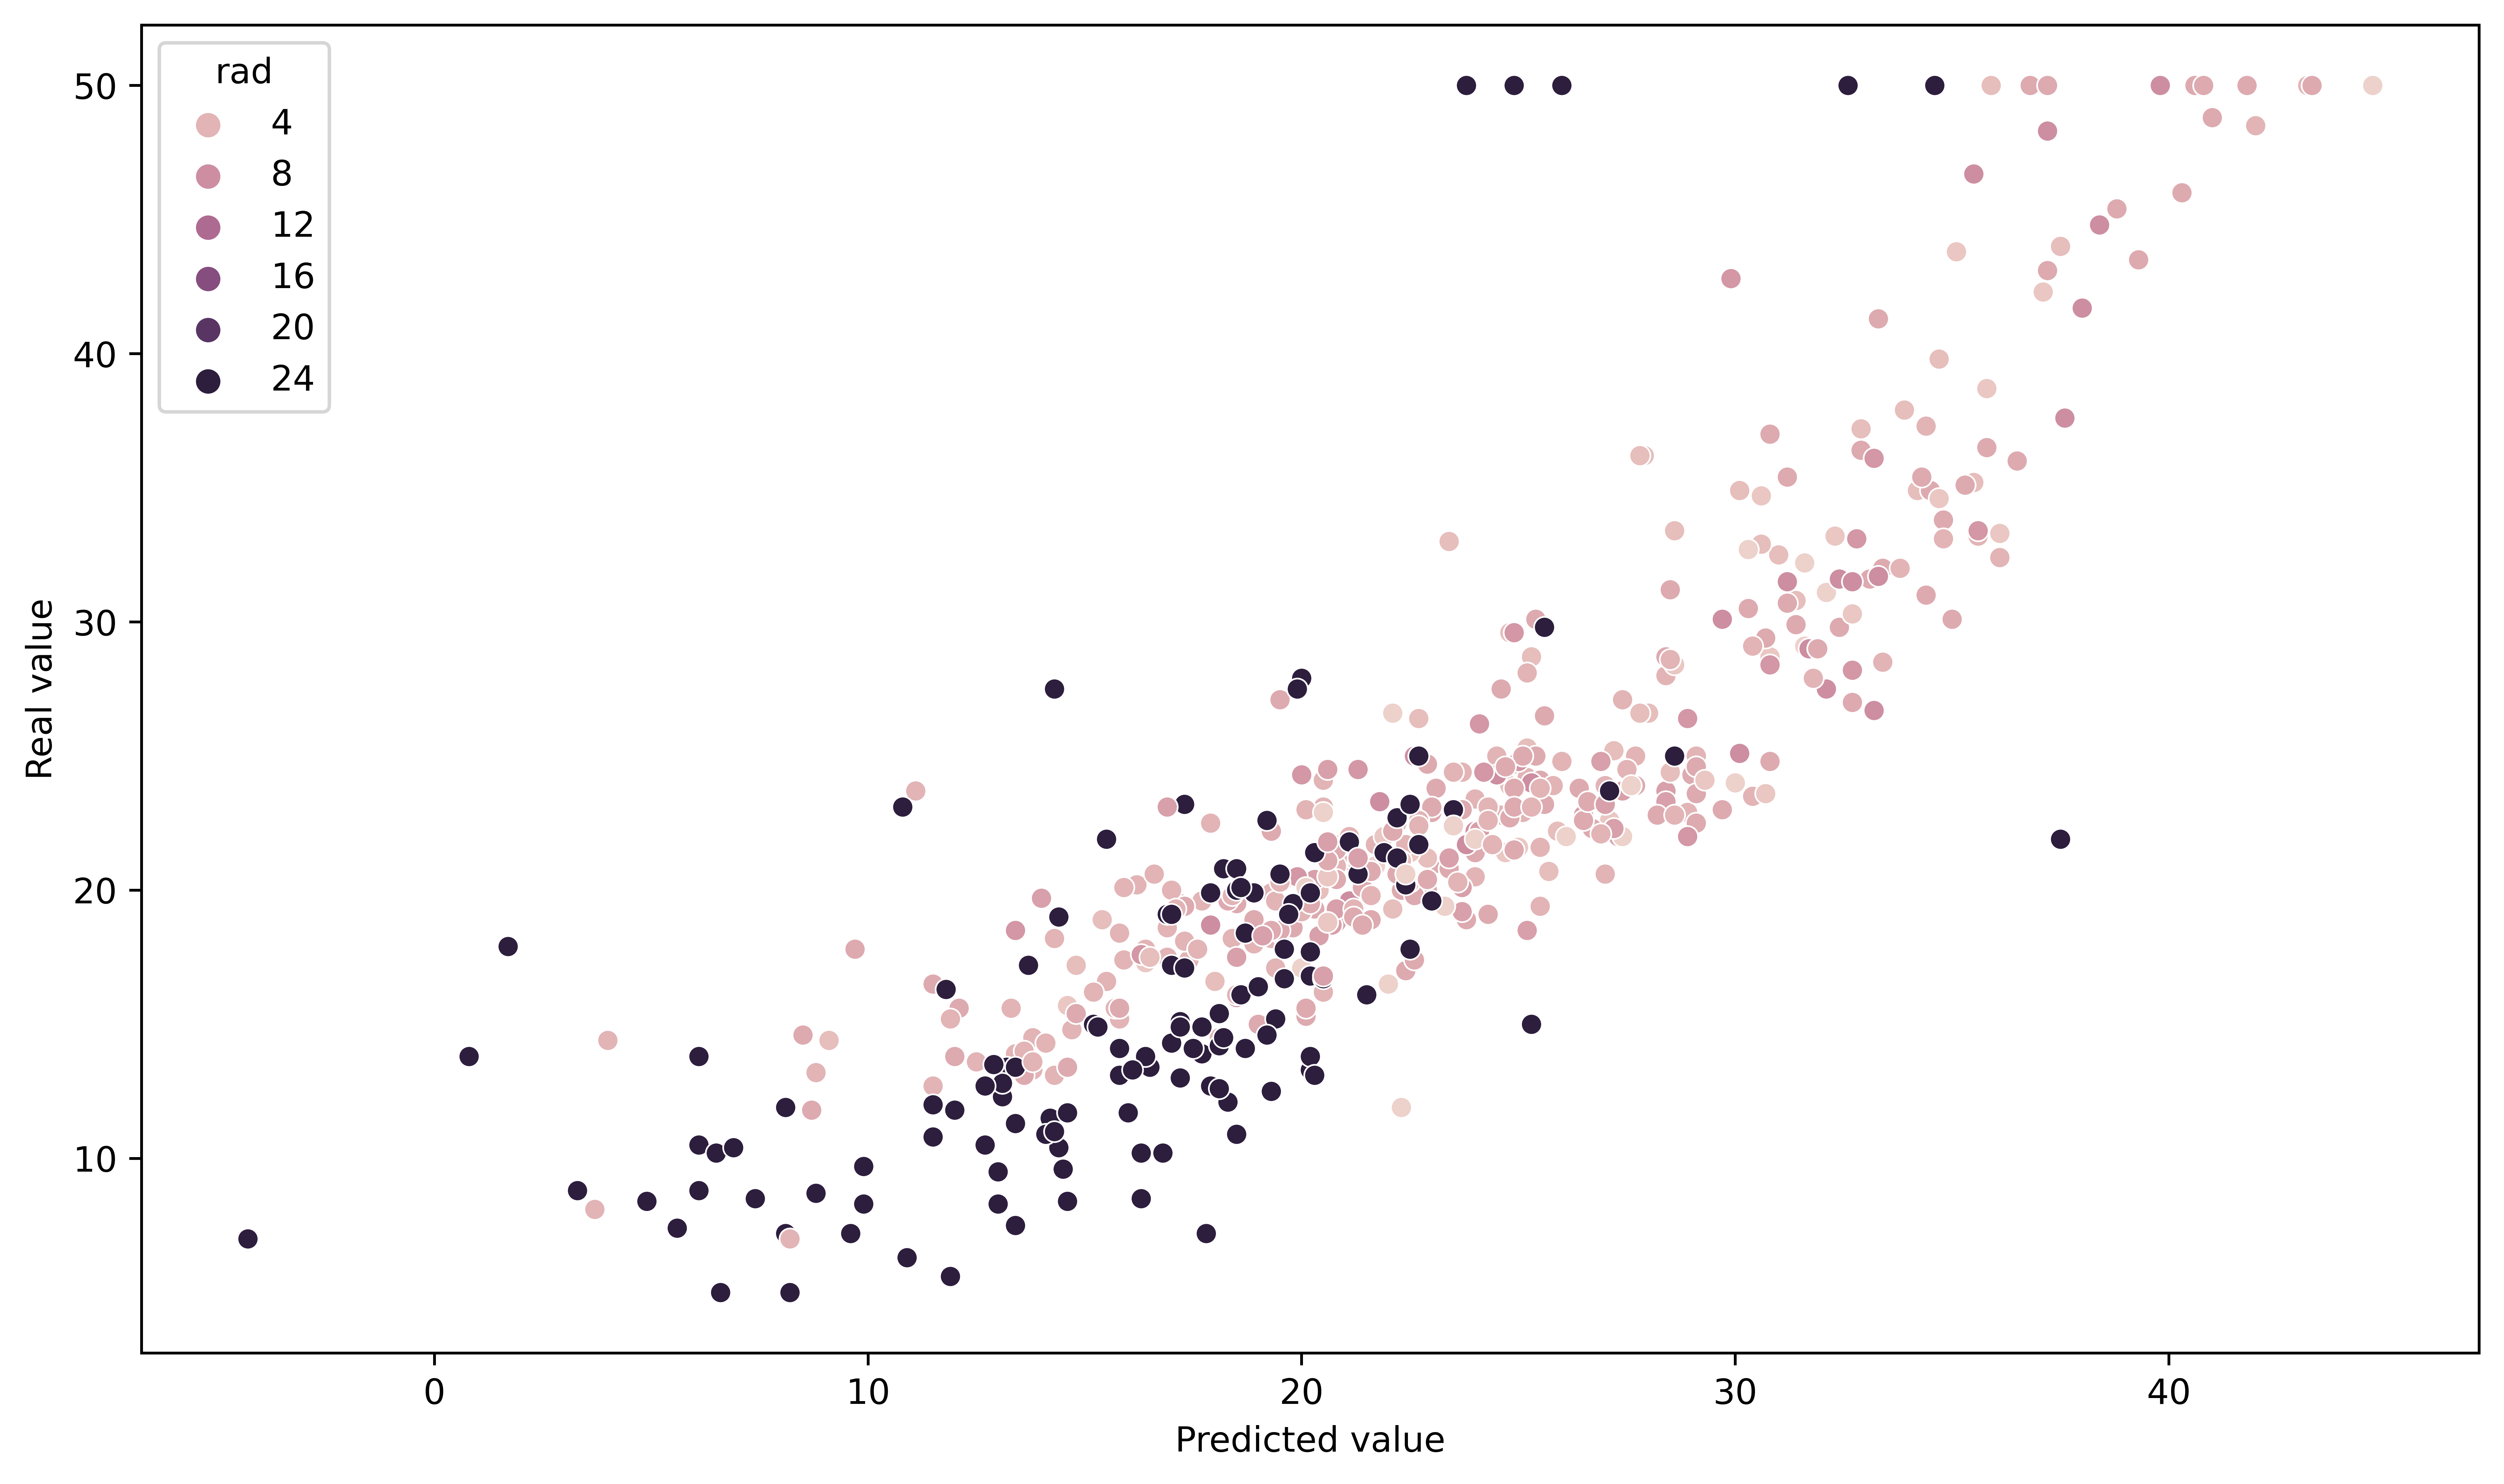

In [269]:
predict_target_rad = pd.DataFrame(list(zip(target_predict.round(1), boston_house_target, boston_house.rad )),
                                columns =['Predicted target', 'Real target', 'rad'])
predict_target_ch
plt.figure(figsize=[12,7], dpi=900)
sns.scatterplot(x='Predicted target', y='Real target', data=predict_target_rad, hue='rad')
plt.xlabel('Predicted value')
plt.ylabel('Real value')

The scatterplot demonstrates that all options except 24 index spread equal so the distance from radial highways reduces cost but at very large differences of indexes.

In [265]:
model_updated = sm.OLS(boston_house_target, X.drop(columns=["chas", "rad"]))
results_updated = model_updated.fit()

print(results_updated.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     116.9
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          8.71e-130
Time:                        00:18:31   Log-Likelihood:                -1515.9
No. Observations:                 506   AIC:                             3056.
Df Residuals:                     494   BIC:                             3107.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.218    103.465      0.0

If we drop categorical variables, it will lead to decreasing of model quality - *Adj. R-squared: 0.716*. So firstly should to estimate VIF

### VIF

Function for VIF

In [270]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]

    return vif_data

In [272]:
calculate_vif(X)

,feature,VIF
0,const,1.000000
1,crim,1.792192
2,zn,2.298758
3,indus,3.991596
4,chas,1.073995
5,nox,4.393720
6,rm,1.933744
7,age,3.100826
8,dis,3.955945
9,rad,7.484496


Rad really has a huge colinearity but, like attempt, try to drop chas and rad simultaniously

In [273]:
calculate_vif(X.drop(columns=["chas", "rad"]))

,feature,VIF
0,const,1.000000
1,crim,1.663648
2,zn,2.272992
3,indus,3.660714
4,nox,4.294324
5,rm,1.880883
6,age,3.077311
7,dis,3.953729
8,tax,3.403205
9,ptratio,1.725085


It seems like a strange idea so will act subsequently.

Initially delete rad and compare new model and VIF.

In [328]:
model_updated_1 = sm.OLS(boston_house_target, X.drop(columns=["rad"]))
results_updated_1 = model_updated_1.fit()

print(results_updated_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     110.8
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          1.92e-131
Time:                        03:13:52   Log-Likelihood:                -1509.5
No. Observations:                 506   AIC:                             3045.
Df Residuals:                     493   BIC:                             3100.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.215    104.682      0.0

In [329]:
calculate_vif(X.drop(columns=["rad"]))

,feature,VIF
0,const,1.000000
1,crim,1.664471
2,zn,2.273018
3,indus,3.682265
4,chas,1.061561
5,nox,4.304929
6,rm,1.885425
7,age,3.083009
8,dis,3.954951
9,tax,3.415289


It reduced the quality of the model (Adj. R-squared: 0.723) and imrove VIF. Since our goal to reveal the most important feature (not prediction) we can allow to sacrifice the quality of the model for discovering hidden dependencies

In [330]:
calculate_vif(X.drop(columns=["rad", "dis"]))

,feature,VIF
0,const,1.000000
1,crim,1.638205
2,zn,1.897074
3,indus,3.511704
4,chas,1.061233
5,nox,3.949993
6,rm,1.849614
7,age,2.821975
8,tax,3.414851
9,ptratio,1.720096


In [331]:
calculate_vif(X.drop(columns=["nox", "rad", "dis"]))

,feature,VIF
0,const,1.000000
1,crim,1.637882
2,zn,1.826807
3,indus,3.155735
4,chas,1.057774
5,rm,1.847368
6,age,2.430656
7,tax,3.073277
8,ptratio,1.504126
9,b,1.331457


etc... I will skip how I did each stage, but in the end it turned out the following

In [332]:
calculate_vif(X.drop(columns=["tax", "indus", "nox", "rad", "zn", "lstat", "dis"]))

,feature,VIF
0,const,1.000000
1,crim,1.333301
2,chas,1.041442
3,rm,1.190387
4,age,1.254365
5,ptratio,1.247573
6,b,1.209671


In [293]:
model_updated_3 = sm.OLS(boston_house_target, X.drop(columns=["tax", "indus", "nox", "rad", "zn", "lstat", "dis"]))
results_updated_3 = model_updated_3.fit()

print(results_updated_3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     145.9
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          2.18e-106
Time:                        01:02:46   Log-Likelihood:                -1583.9
No. Observations:                 506   AIC:                             3182.
Df Residuals:                     499   BIC:                             3211.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.248     90.913      0.0

It's decrease the model quality (Adj. R-squared: 0.633) but help to idetify the most crucial featuries.

Then create barplot of every coefficient without constant

C:\Users\ornfi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

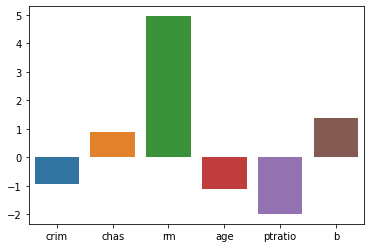

In [295]:
sns.barplot(results_updated_3.params.index[1:], results_updated_3.params[1:])

Try to compare the prediction of target by current model and error distribution

In [333]:
prediction_ult = results_updated_3.get_prediction(X.drop(columns=["tax", "indus", "nox", "rad", "zn", "lstat", "dis"]))
target_predict_ult = prediction_ult.predicted_mean

In [334]:
predict_target_ult = pd.DataFrame(list(zip(target_predict_ult.round(1), boston_house_target)),
                                columns =['Predicted target', 'Real target'])
predict_target_ult

,Predicted target,Real target
0,28.4,24.0
1,24.4,21.6
2,30.5,34.7
3,29.0,33.4
4,29.7,36.2
...,...,...
501,23.0,22.4
502,19.4,20.6
503,24.9,23.9
504,23.6,22.0


Text(24.05000000000001, 0.5, 'Real value')

<Figure size 10800x6300 with 0 Axes>

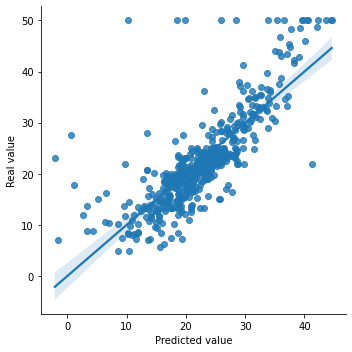

In [300]:
plt.figure(figsize=[12,7], dpi=900)
sns.lmplot(x='Predicted target', y='Real target', data=predict_target_ult, order=1)
plt.xlabel('Predicted value')
plt.ylabel('Real value')

In [305]:
errors_upd = boston_house_target - target_predict_ult

In [306]:
scipy.stats.shapiro(errors_upd)  #H0 reject - isn't normal disribution

ShapiroResult(statistic=0.8326656818389893, pvalue=1.2416456078012506e-22)

<AxesSubplot:xlabel='medv', ylabel='Count'>

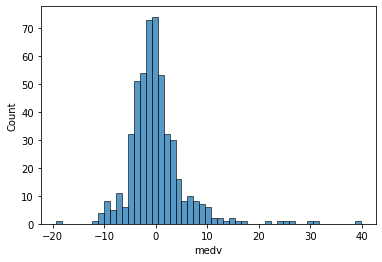

In [307]:
sns.histplot(errors_upd)

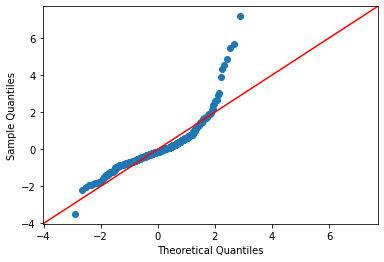

In [309]:
result = sm.qqplot(errors_upd, line='45', fit=True)

As result the prediction became worse and error distribution also reflects this observation.

However, we can identify the important for prices features:

- the house price will become higher if tract bounds river
- the lower the crime rate per capita - the more expensive the house will be
- average number of rooms per dwelling: the more rooms - the higher price
- proportion of owner-occupied units built prior to 1940 has a negative correlation with price
- increasing of pupil-teacher ratio leads to decreasing of price
- the more people of African-American descent, the higher the price

Final equation:

medv = 22.53 - 0.93 * crim + 0.9 * chas + 4.95 * rm - 1.13 * age - 1.99 * ptratio + 1.37 * b